# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Azka Nabihan
- **Email:** azka.nabihan9@gmail.com
- **ID Dicoding:** azka_nabihan

## Menentukan Pertanyaan Bisnis

- paling banyak sepeda akan disewa ketika hari libur atau hari kerja?
- pada musim apa sepeda paling banyak disewa dan pada musim apa sepeda paling sedikit disewa?
- pada cuaca apa sepeda paling banyak disewa dan pada musim apa sepeda paling sedikit disewa?
- pengaruh suhu terhadap banyaknya penyewa sepeda


## Import Semua Packages/Library yang Digunakan

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [47]:
main_df = pd.read_csv("https://raw.githubusercontent.com/Azka-Nabihan/AnalyzeWithPython/main/data/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/Azka-Nabihan/AnalyzeWithPython/main/data/hour.csv")

### Assessing Data

In [48]:
# Assesing data for main_df
print("\n", main_df.isnull().sum())
print("\n", main_df.describe())
print("\nTotal duplikasi: ", main_df.duplicated().sum())
print("\n", main_df.info())  # dteday berupa object, harusnya berupa datetime


 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

           instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000  

In [49]:
# Assesing data for hour_df
print("\n", hour_df.isnull().sum())
print("\n", hour_df.describe())
print("\nTotal Duplikasi", hour_df.duplicated().sum())
print("\n", hour_df.info())


 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holid

### Cleaning Data

In [50]:
# Cleaning data for day_df
datetime_colums = ["dteday"]
for column in datetime_colums:
    main_df[column] = pd.to_datetime(main_df[column])
print("\n", main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [51]:
# Cleaning data for hour_df
datetime_colums = ["dteday"]
for column in datetime_colums:
    hour_df[column] = pd.to_datetime(hour_df[column])
print("\n", hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [52]:
def create_dayUser(df):
    dayUser_df = df.groupby(by="workingday").cnt.sum().reset_index()
    dayUser_df.workingday.replace(1, "Working Day", inplace=True)
    dayUser_df.workingday.replace(0, "Holiday", inplace=True)

    return dayUser_df

def create_season_df(df):
    season_df = df.groupby(by="season").cnt.sum().reset_index()
    season_df.season.replace(1, "Spring", inplace=True)
    season_df.season.replace(2, "Summer", inplace=True)
    season_df.season.replace(3, "Fall", inplace=True)
    season_df.season.replace(4, "Winter", inplace=True)

    return season_df

def create_weather_df(df):
    weather_df = df.groupby(by="weathersit").cnt.sum().reset_index()
    weather_df.weathersit.replace(1, "Clear", inplace=True)
    weather_df.weathersit.replace(2, "Mist/Cloudy", inplace=True)
    weather_df.weathersit.replace(3, "Light Snow/Rain", inplace=True)
    weather_df.weathersit.replace(4, "Heavy Rain/Ice Pallets", inplace=True)

    return weather_df

def create_temp_df(df):
    # pengaruh suhu terhadap banyaknya penyewa sepeda?
    temp_df = df.groupby(by="temp").cnt.sum().reset_index()
    # mengalikan temp dengan 41 agar mendapatkan nilai sesungguhnya dan dibulatkan
    temp_df["temp"] = temp_df["temp"].apply(lambda x: x * 41).round(1)

    return temp_df

def create_rfm_df(df):
    # Parameter RFM
    rfm_df = df.groupby(by="instant", as_index=False).agg({
        "dteday": "max",    # mengambil tanggal order terakhir
        "cnt": "sum"
    })
    rfm_df.columns = ["ID", "max_order_timestamp", "frequency"]
    # menghitung kapan terakhir pelanggan melakukan transaksi [hari]
    rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])
    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    df["dteday"] = pd.to_datetime(df["dteday"])
    recent_date = df["dteday"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
    # menghapus kolom max_order_timestamp karena sudah tidak dibutuhkan
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

    return rfm_df


# memanggil helper function
dayUser_df = create_dayUser(main_df)
season_df = create_season_df(main_df)
weather_df = create_weather_df(main_df)
temp_df = create_temp_df(main_df)
rfm_df = create_rfm_df(main_df)


## Visualization & Explanatory Analysis

### Paling banyak sepeda akan disewa ketika hari libur atau hari kerja?

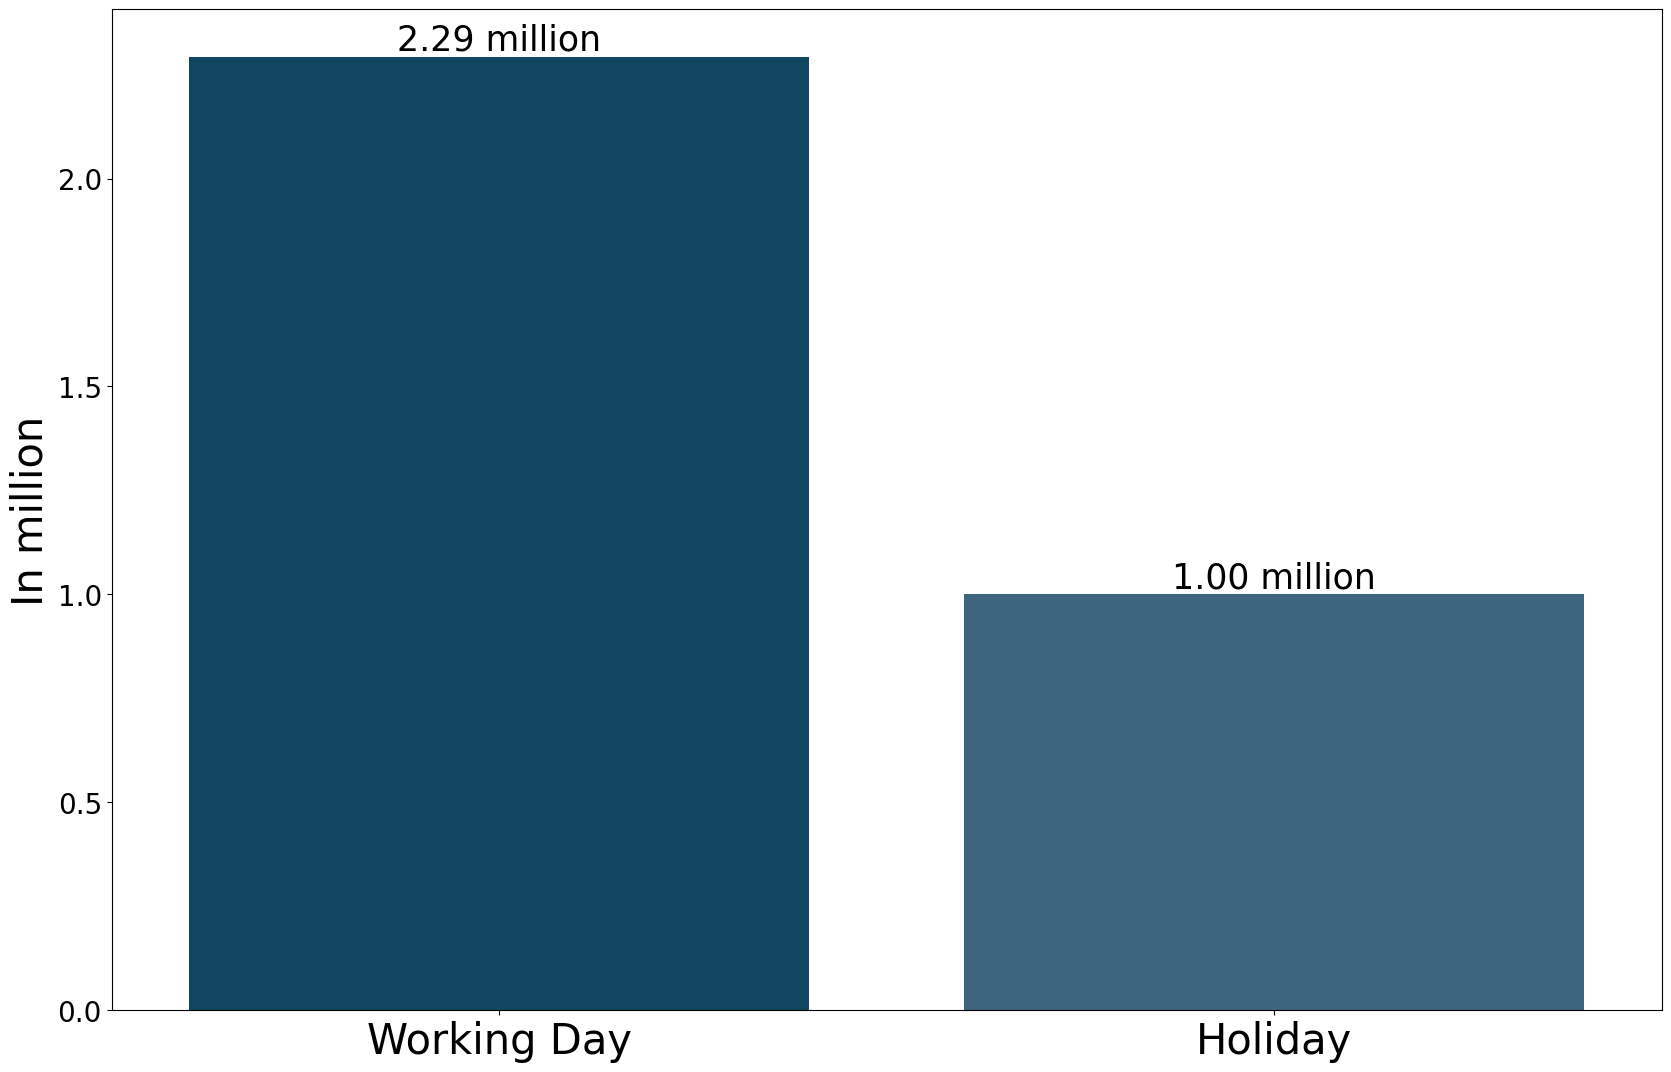

In [53]:
fig, ax = plt.subplots(figsize=(20, 13))
colors=["#004c6d", "#346888"]
# convert to million
dayUser_df["cnt"] = dayUser_df["cnt"].apply(lambda x: x / 1e6)

sns.barplot(
    x="workingday",
    y="cnt",
    data=dayUser_df.sort_values(by="cnt", ascending=False),
    hue="workingday",
    palette=colors,
    ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f million', fontsize=25)
ax.bar_label(ax.containers[1], fmt='%.2f million', fontsize=25)
ax.set_ylabel("In million", fontsize=30)
ax.set_xlabel(None)
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=20)
plt.show()

### Pada musim apa sepeda paling banyak disewa dan pada musim apa sepeda paling sedikit disewa

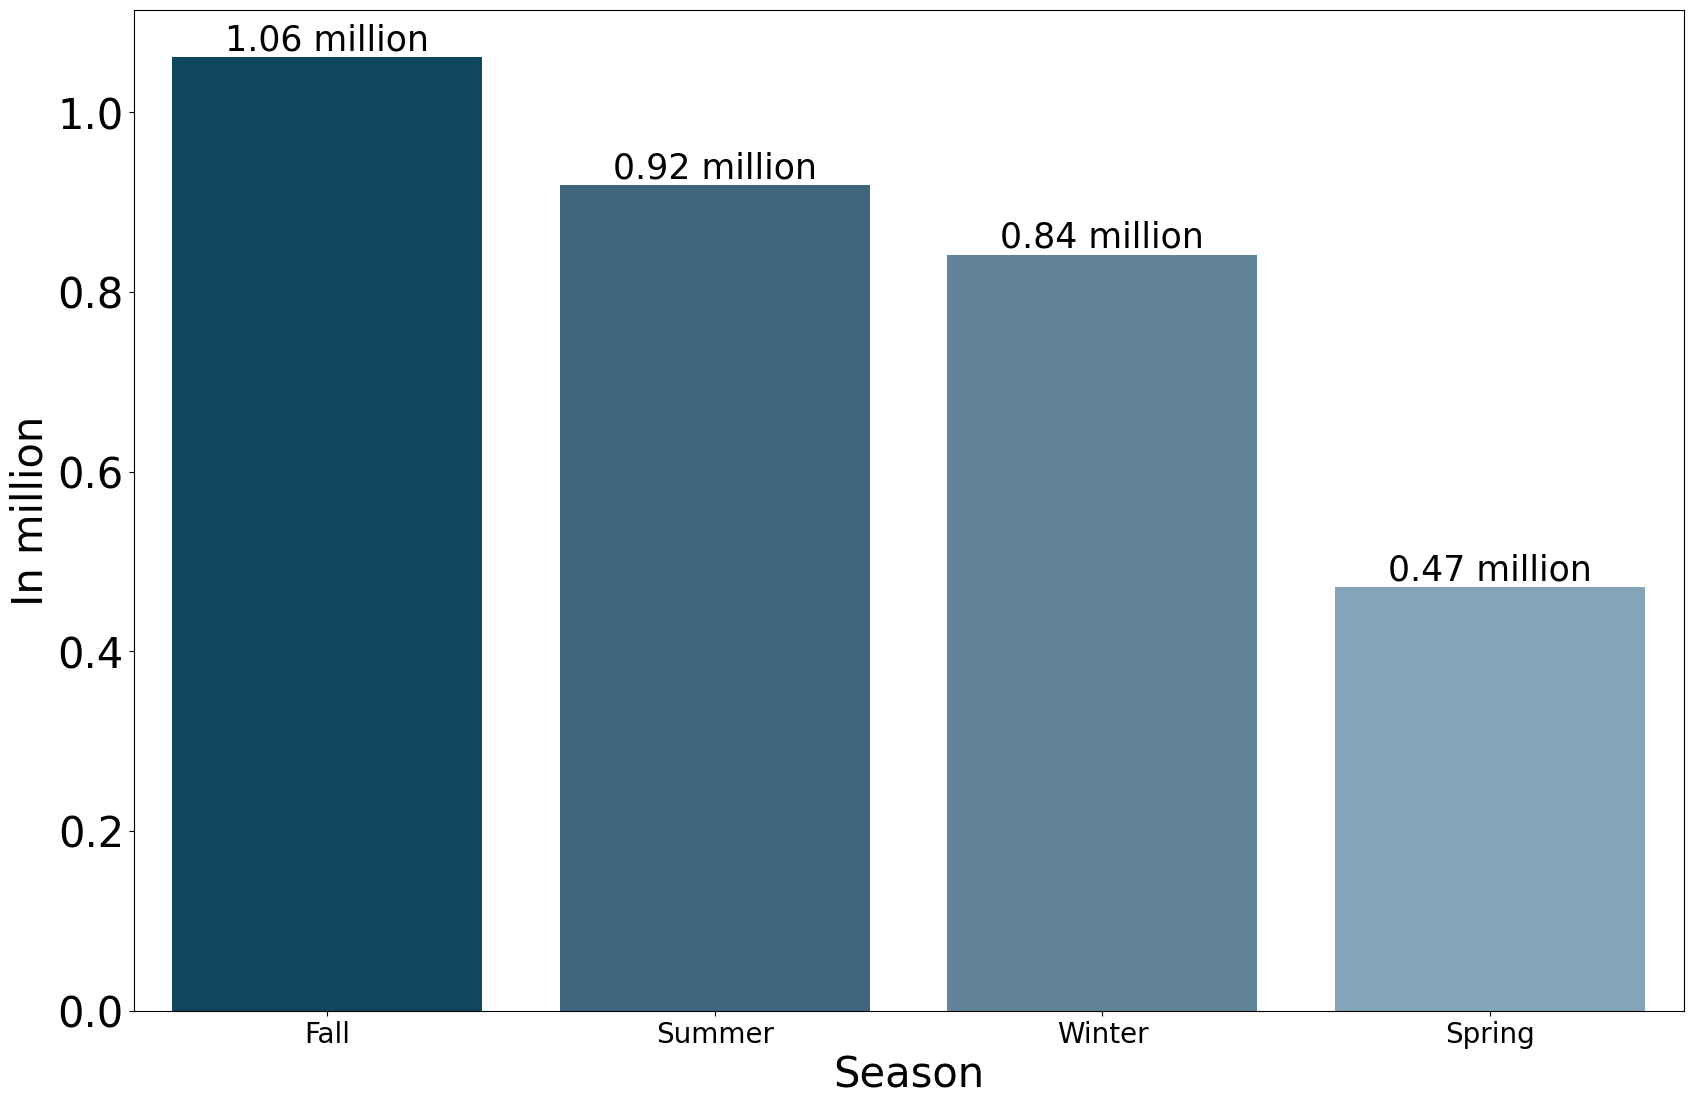

In [54]:
fig, ax = plt.subplots(figsize=(20, 13))
colors = ["#004c6d", "#346888", "#5886a5", "#7aa6c2"]
# convert to million
season_df["cnt"] = season_df["cnt"].apply(lambda x: x / 1e6)

sns.barplot(
    y="cnt",
    x="season",
    data=season_df.sort_values(by="cnt", ascending=False),
    hue="season",
    palette=colors,
    ax=ax
)
ax.bar_label(ax.containers[0], fmt='%.2f million', fontsize=25)
ax.bar_label(ax.containers[1], fmt='%.2f million', fontsize=25)
ax.bar_label(ax.containers[2], fmt='%.2f million', fontsize=25)
ax.bar_label(ax.containers[3], fmt='%.2f million', fontsize=25)
ax.set_xlabel("Season", fontsize=30)
ax.set_ylabel("In million", fontsize=30)
ax.tick_params(axis="y", labelsize=30)
ax.tick_params(axis="x", labelsize=20)
plt.show()

### Pada cuaca apa sepeda paling banyak disewa dan pada musim apa sepeda paling sedikit disewa?

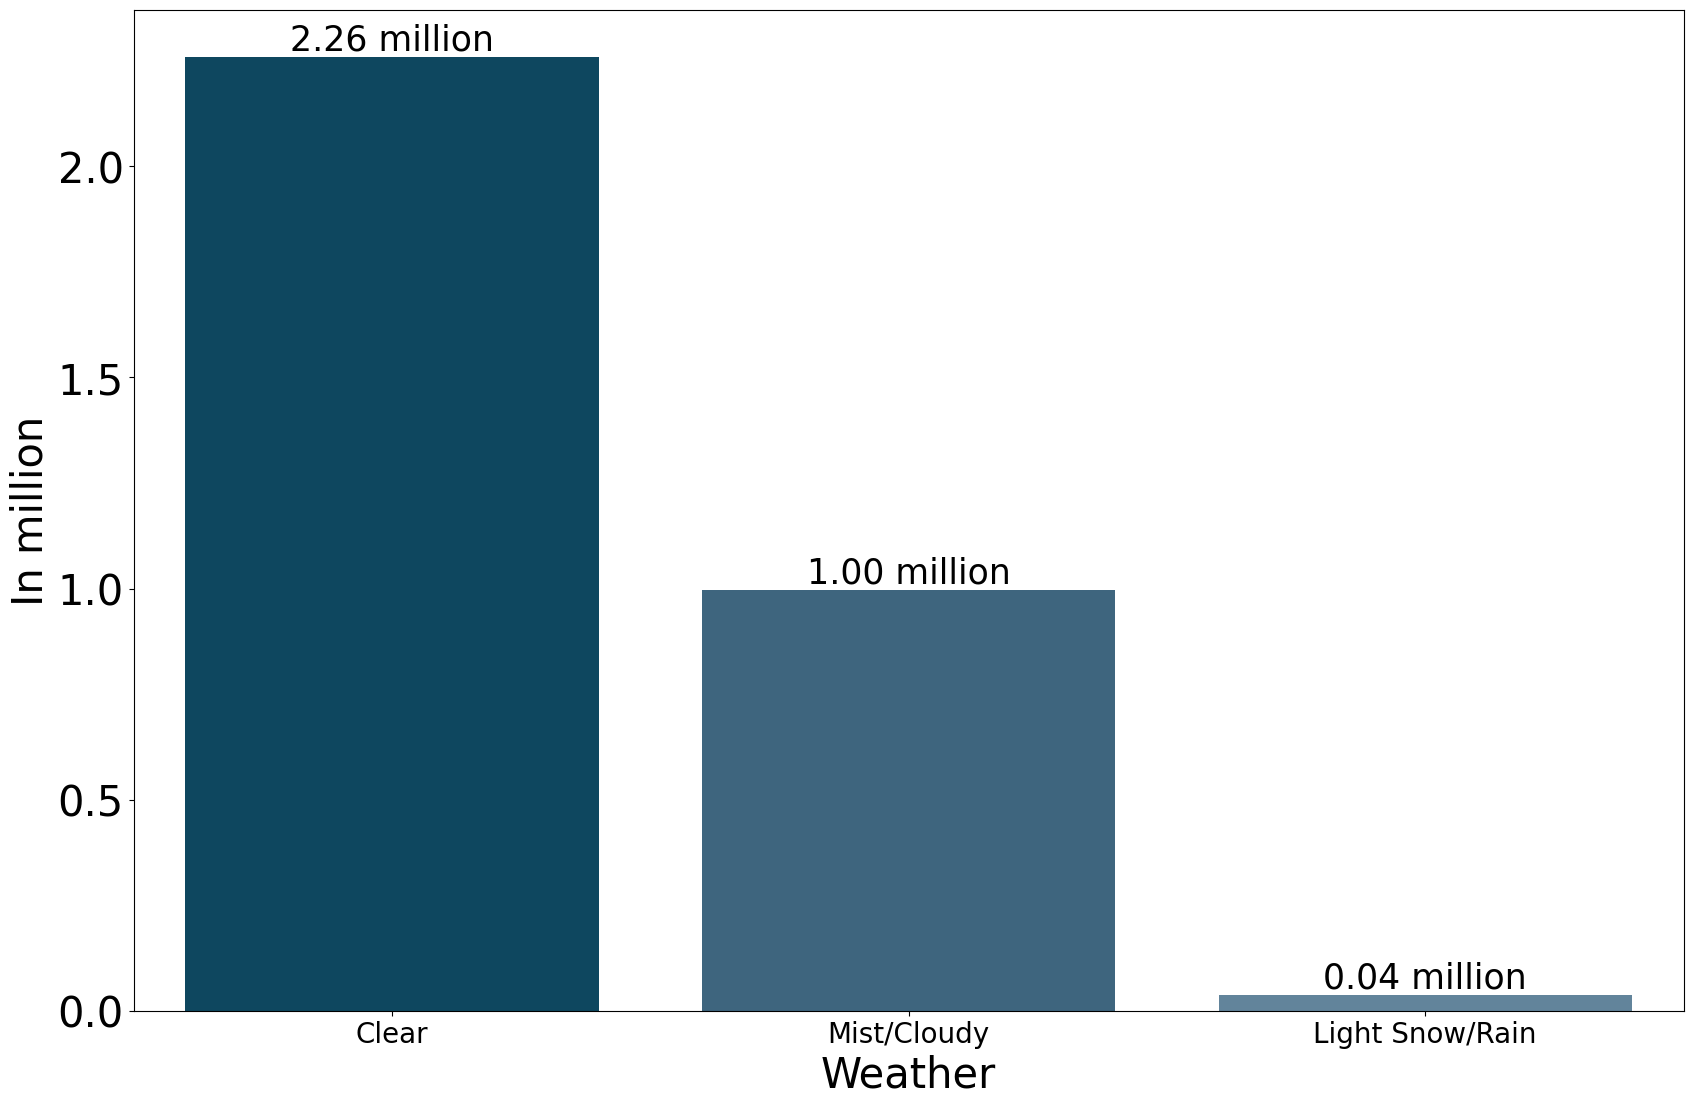

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 13))
colors = ["#004c6d", "#346888", "#5886a5"]
# convert to million
weather_df["cnt"] = weather_df["cnt"].apply(lambda x: x / 1e6)

sns.barplot(
    y="cnt",
    x="weathersit",
    data=weather_df.sort_values(by="cnt", ascending=False),
    palette=colors,
    hue="weathersit",
    ax=ax
)
ax.bar_label(ax.containers[0], fmt='%.2f million', fontsize=25)
ax.bar_label(ax.containers[1], fmt='%.2f million', fontsize=25)
ax.bar_label(ax.containers[2], fmt='%.2f million', fontsize=25)
ax.set_xlabel("Weather", fontsize=30)
ax.set_ylabel("In million", fontsize=30)
ax.tick_params(axis="y", labelsize=30)
ax.tick_params(axis="x", labelsize=20)
plt.show()

### Pengaruh suhu terhadap banyaknya penyewa sepeda:


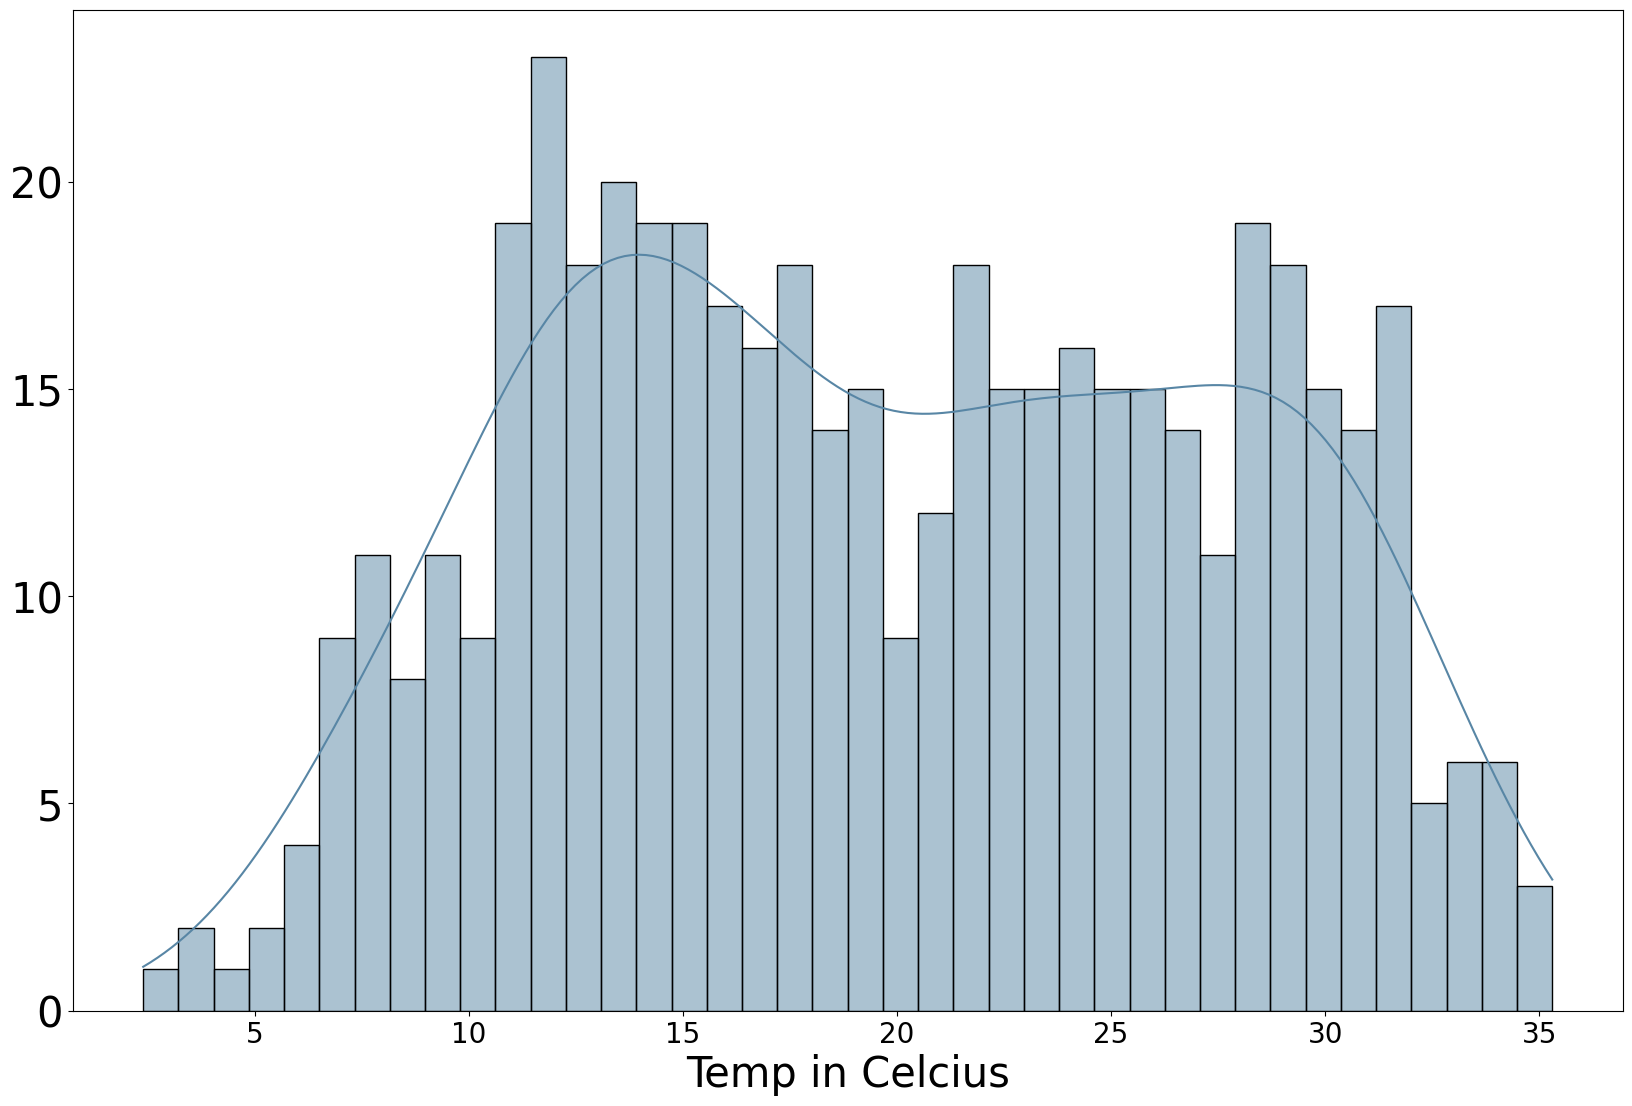

In [56]:
# convert to million
temp_df["cnt"] = temp_df["cnt"].apply(lambda x: x / 1e6)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 13))
sns.histplot(data=temp_df, x="temp", kde=True, ax=ax, bins=40, color='#5886a5', line_kws={'color': '#346888'})
ax.tick_params(axis="y", labelsize=30)
ax.tick_params(axis="x", labelsize=20)
ax.set_ylabel(None)
ax.set_xlabel("Temp in Celcius", fontsize=30)
plt.show()

# RFM Analysis

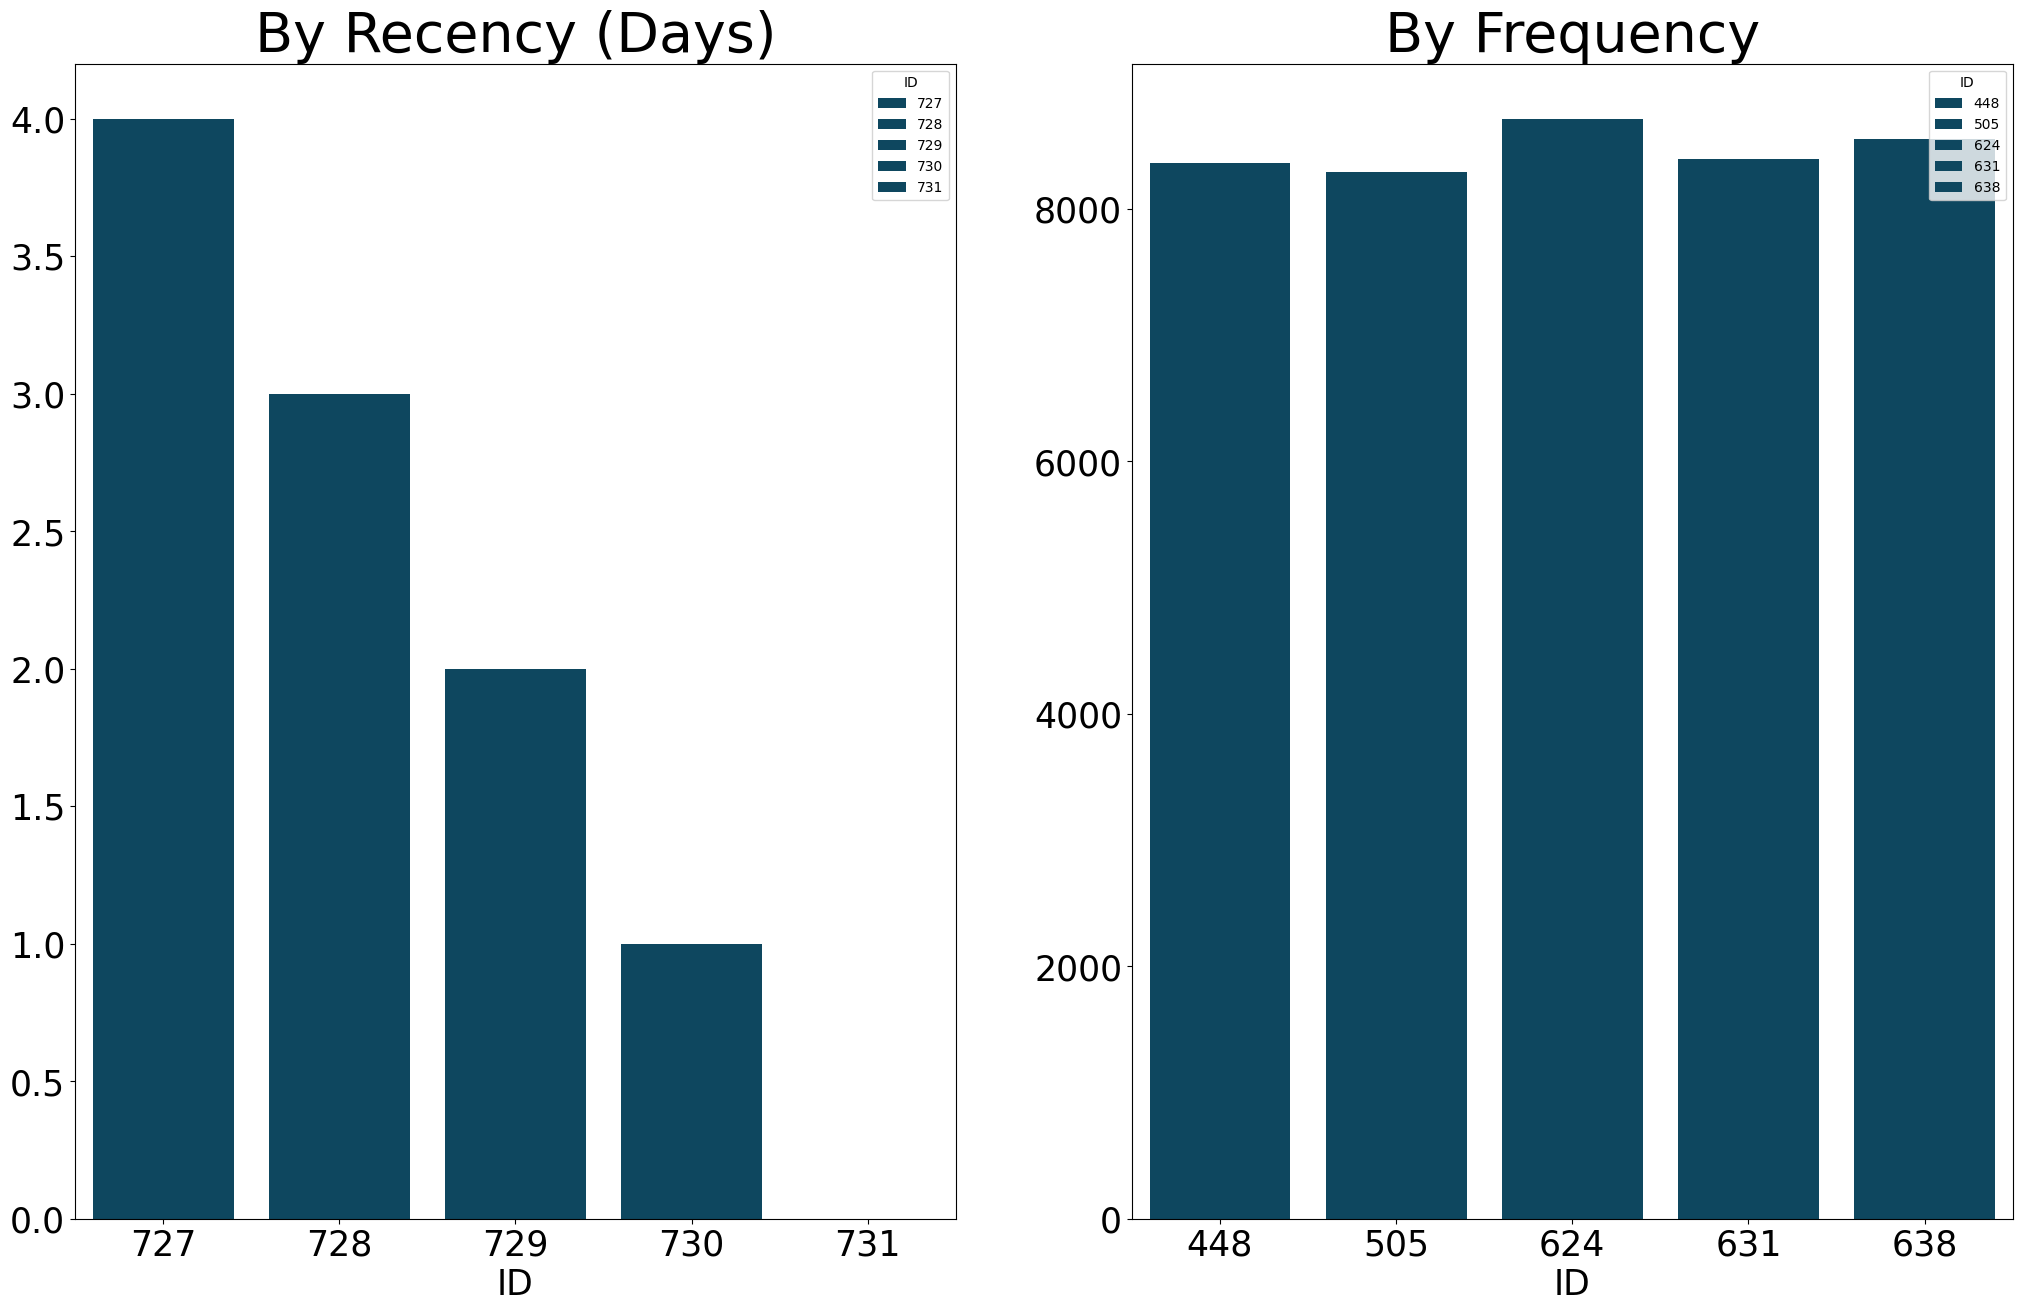

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 15))
colors=["#004c6d", "#004c6d", "#004c6d", "#004c6d", "#004c6d"]
sns.barplot(
    y="recency",
    x="ID",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    hue="ID",
    ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("ID", fontsize=25)
ax[0].set_title("By Recency (Days)", loc="center", fontsize=40)
ax[0].tick_params(axis="x", labelsize=25)
ax[0].tick_params(axis="y", labelsize=25)

sns.barplot(
    y="frequency",
    x="ID",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    hue="ID",
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("ID", fontsize=25)
ax[1].set_title("By Frequency", loc="center", fontsize=40)
ax[1].tick_params(axis="x", labelsize=25)
ax[1].tick_params(axis="y", labelsize=25)

plt.show()

## Conclusion

### Paling banyak sepeda akan disewa ketika hari libur atau hari kerja?

Pada perhitungan yang dibuat dengan visualisasi perbandingan hari kerja dan hari libur (weekend atau tanggal merah), terlihat pada hari kerja disewa lebih banyak 2x dibanding hari libur dengan nilai 2,2 juta. Pada hari libur terdapat 1 juta penyewa. Konklusi yang dapat diambil adalah sepeda paling banyak dipakai pada hari kerja karena digunakan untuk transportasi kerja.

### Pada musim apa sepeda paling banyak disewa dan pada musim apa sepeda paling sedikit disewa

Pada perhitungan 4 musim paling banyak digunakan pada musim gugur dan paling sedikit digunakan pada musim semi.
- pada musim gugur sepeda paling banyak digunakan karena secara suhu tidak terlalu dingin dan didukung dengan pemandagan musim gugur yang indah.
- pada musim panas kedua paling banyak digunakan karena secara suhu berkisar 25°C-35°C, panas yang berlebihan mempengaruhi penggunaan sepeda yang tidak begitu banyak
- pada musim dingin menjadi ketiga paling banyak digunakan karena suhu yang dingin dan salju di jalan yang membuat susahnya mengendarai sepeda dan orang cenderung mengurangin aktivitas di luar ruangan
- pada musim semi menjadi paling sedikit mirip, meskipun secara suhu sangat nyaman ada kemungkinan menjadi musim penggunaan paling sedikit karena orang-orang beralih ke aktivitas lain.
- konklusi : pada musim gugur adalah musim paling favorit menjadi penggunaan sepeda karena secara suhu dan lingkungan yang paling disukai oleh user

### Pada musim apa sepeda paling banyak disewa dan pada musim apa sepeda paling sedikit disewa

pada data terdapat 3 cuaca yaitu clear, mist + cloudy, dan light snow/light rain.
- pada ketiga cuaca tersebut paling banyak saat cuaca clear karena tidak menggangu pengguna sepeda dan membuat pengalaman sepeda lebih nyaman.
- pada cuaca berkabut atau berawan menjadi kedua terbanyak karena jika berkabut akan mempengaruhi pengalaman bersepeda karena kurangnya jarak pandang dan saat berawan cuaca menurun dan ada kekhawatiran akan hujan atau badai
- pada cuaca salju ringan atau hujan menjadi paling sedikit dengan perbandingan dibanding data lain sangat jauh karena ketika hujan dan bersalju sangat mengganggu pesepeda dan tidak cocok untuk bersepeda di saat cuaca seperti itu
- konkulusi : saat cuaca clear adalah cuaca yang paling banyak digunakan untuk bersepeda



### Pengaruh suhu terhadap banyaknya penyewa sepeda


pada range suhu 5°C-35°C terlihat paling banyak sepeda digunakan 10°C-15°C dan terlihat konstan dari 20°C-30°C lalu menurun. Pada suhu ekstrem di bawah 10°C dan di atas 30°C menjadi penyewa sepeda paling sedikit.
konklusi : banyak pengguna dan suhu tergantung pada ranget tertentu dengan paling banyak pada suhu 10°C-15°C dan paling sedikit di bawah 10°C dan di atas 30°C

### RFM Analysis

- Rata-rata pelanggan memiliki frekuensi pembelian sebanyak 4504.35 kali. Ini menunjukkan bahwa secara umum, pelanggan memiliki tingkat aktivitas yang tinggi dan sering melakukan pembelian. Frekuensi yang tinggi dapat diartikan bahwa ada kelompok pelanggan yang sangat setia dan sering berinteraksi dengan bisnis.
- Rata-rata pelanggan melakukan transaksi setiap 365 hari. Ini menunjukkan bahwa pelanggan rata-rata melakukan pembelian sekali dalam setahun. Nilai yang cukup tinggi ini bisa mengindikasikan bahwa ada sedikit aktivitas pembelian yang berulang atau pelanggan cenderung tidak bertransaksi secara teratur.